In [3]:
from fbprophet import Prophet
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [6]:
df = df.loc[:, ['passengers']]
df.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [7]:
months = pd.date_range('19490101', periods=144, freq='M')
months

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [8]:
df['ds']=months
df.head()

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


In [9]:
df.dtypes

passengers             int64
ds            datetime64[ns]
dtype: object

In [10]:
df = df.rename(columns={'passengers':'y'})
df = df.sort_index(axis=1)
df.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [11]:
my_forecast = Prophet(interval_width=0.95)

In [12]:
my_forecast.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
forecast_periods = my_forecast.make_future_dataframe(periods=36, include_history=True, freq='M')
forecast_periods.tail()

,ds
175,1963-08-31
176,1963-09-30
177,1963-10-31
178,1963-11-30
179,1963-12-31


In [16]:
forecast = my_forecast.predict(forecast_periods)
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'yhat'],
      dtype='object')

In [17]:
forecast1 = forecast.loc[:, ['ds','yhat']]
forecast1

,ds,yhat
0,1949-01-31,85.355387
1,1949-02-28,77.646439
2,1949-03-31,110.960885
3,1949-04-30,108.664083
4,1949-05-31,111.922666
5,1949-06-30,152.114080
6,1949-07-31,190.761381
7,1949-08-31,190.090409
8,1949-09-30,140.619027
9,1949-10-31,104.561276


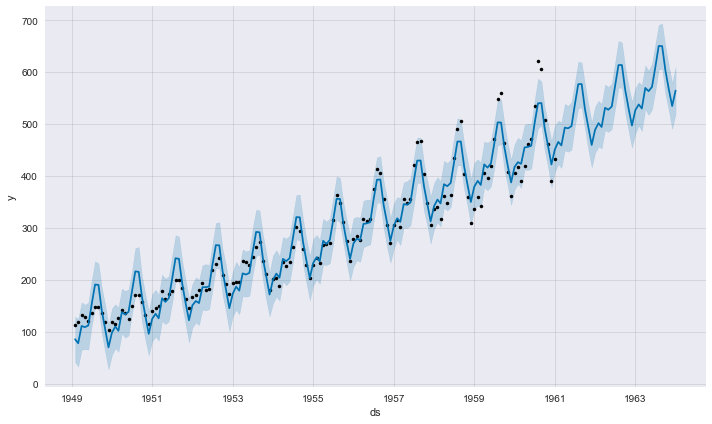

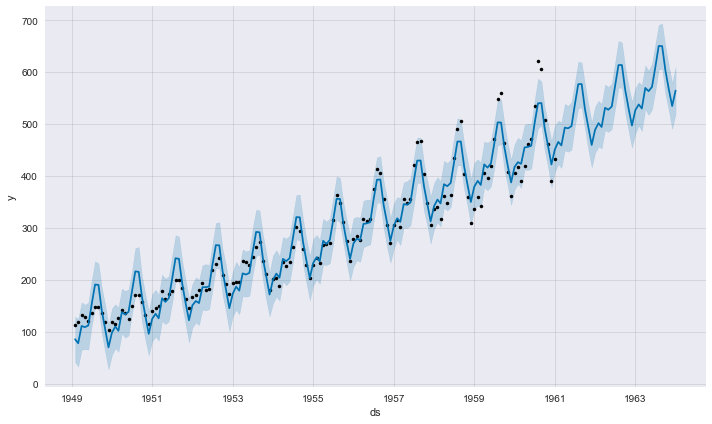

In [21]:
my_forecast.plot(forecast, uncertainty=True)

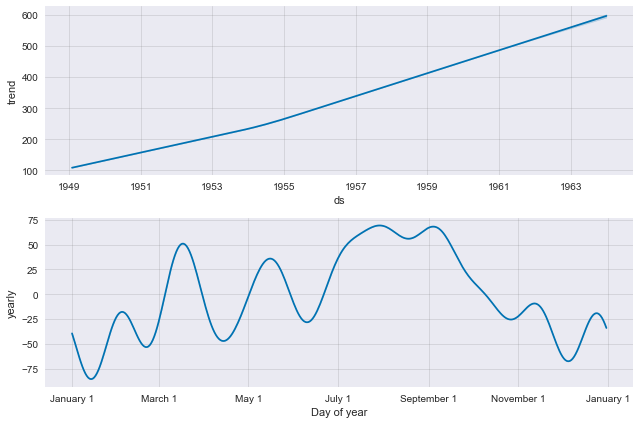

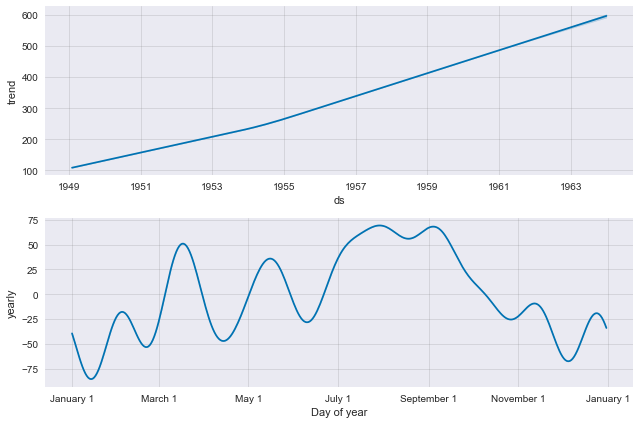

In [22]:
my_forecast.plot_components(forecast)

In [24]:
final_df=pd.merge(forecast1, df, on='ds', how='inner' )
final_df.head()

,ds,yhat,y
0,1949-01-31,85.355387,112
1,1949-02-28,77.646439,118
2,1949-03-31,110.960885,132
3,1949-04-30,108.664083,129
4,1949-05-31,111.922666,121


In [46]:
final_df.tail()

,ds,yhat,y
139,1960-08-31,540.546510,606
140,1960-09-30,491.378470,508
141,1960-10-31,456.997307,461
142,1960-11-30,422.225422,390
143,1960-12-31,451.115295,432


In [26]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat, final_df.y),0)

17.0

In [27]:
df.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [28]:
df.y=np.log(df.y)

In [29]:
df.head()

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds     trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
0   1949-01-31  4.814317     4.814317     4.814317    4.638733    4.782351   
1   1949-02-28  4.819304     4.819304     4.819304    4.636431    4.776020   
2   1949-03-31  4.824825     4.824825     4.824825    4.767819    4.901191   
3   1949-04-30  4.830168     4.830168     4.830168    4.749943    4.879820   
4   1949-05-31  4.835689     4.835689     4.835689    4.743260    4.882306   
5   1949-06-30  4.841032     4.841032     4.841032    4.880912    5.018475   
6   1949-07-31  4.846555     4.846555     4.846555    4.979222    5.122543   
7   1949-08-31  4.852078     4.852078     4.852078    4.982709    5.122013   
8   1949-09-30  4.857423     4.857423     4.857423    4.847599    4.976348   
9   1949-10-31  4.862946     4.862946     4.862946    4.710439    4.848692   
10  1949-11-30  4.871394     4.871394     4.871394    4.580747    4.714316   
11  1949-12-31  4.880124     4.880124     4.880124    4.694140  

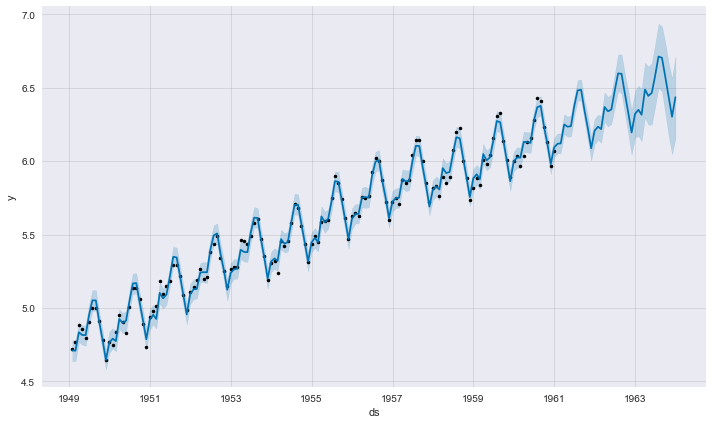

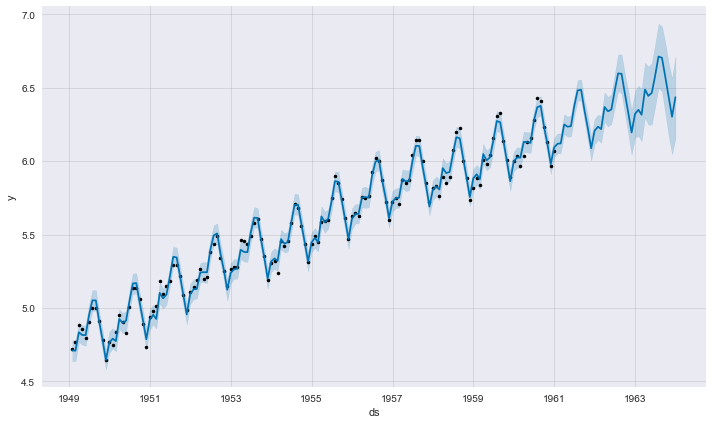

In [39]:
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(df)
forecast_periods = my_forecast.make_future_dataframe(periods=36, include_history=True,freq='M')
forecast = my_forecast.predict(forecast_periods)
print(forecast)
forecast1 = forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast, uncertainty=True)

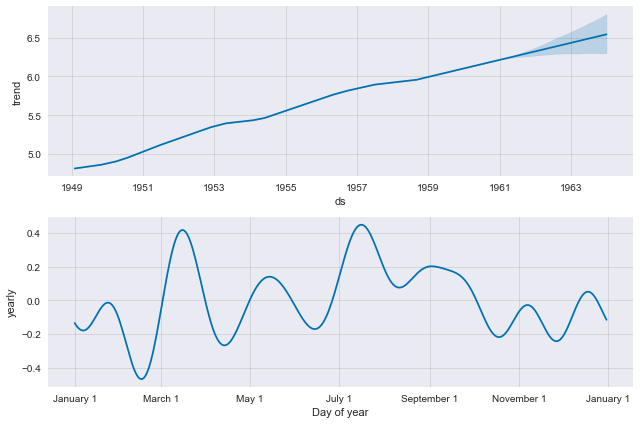

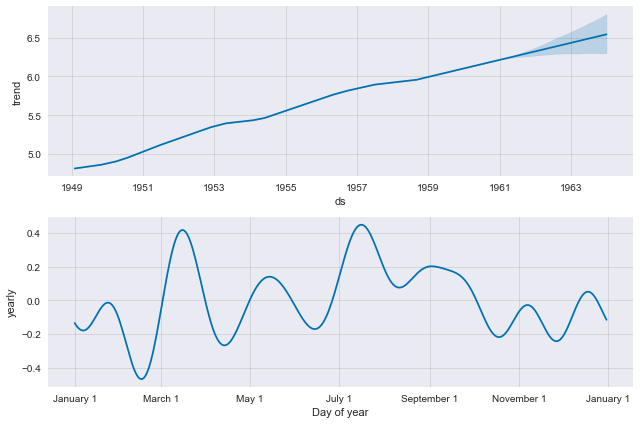

In [32]:
my_forecast.plot_components(forecast)

In [34]:
final_df1 = pd.merge(forecast1, df, on='ds', how='inner')
final_df1.head()

,ds,yhat,y
0,1949-01-31,4.710390,4.718499
1,1949-02-28,4.709145,4.770685
2,1949-03-31,4.834317,4.882802
3,1949-04-30,4.815635,4.859812
4,1949-05-31,4.814848,4.795791


In [36]:
final_df1.yhat = np.e**(final_df1.yhat)
final_df1.y = np.e**(final_df1.y)
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.095515,112.0
1,1949-02-28,110.957198,118.0
2,1949-03-31,125.752632,132.0
3,1949-04-30,123.425133,129.0
4,1949-05-31,123.328108,121.0


In [37]:
np.round(metrics.mean_absolute_error(final_df1.yhat, final_df1.y),0)

7.0

In [38]:
final_df1.tail()

,ds,yhat,y
139,1960-08-31,588.049162,606.0
140,1960-09-30,510.073786,508.0
141,1960-10-31,453.537576,461.0
142,1960-11-30,395.787698,390.0
143,1960-12-31,443.388108,432.0


In [40]:
forecast2 = forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.head()

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,6.119114,6.052633,6.189243
145,1961-02-28,6.121302,6.055376,6.186703
146,1961-03-31,6.250275,6.184957,6.319308
147,1961-04-30,6.235272,6.166469,6.303175
148,1961-05-31,6.238287,6.168630,6.312145


In [41]:
forecast2.yhat = np.e**(forecast2.yhat)
forecast2.yhat_lower = np.e**(forecast2.yhat_lower)
forecast2.yhat_upper = np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,454.0,425.0,487.0
145,1961-02-28,455.0,426.0,486.0
146,1961-03-31,518.0,485.0,555.0
147,1961-04-30,510.0,477.0,546.0
148,1961-05-31,512.0,478.0,551.0
149,1961-06-30,587.0,547.0,626.0
150,1961-07-31,654.0,609.0,701.0
151,1961-08-31,656.0,611.0,704.0
152,1961-09-30,572.0,532.0,612.0
153,1961-10-31,504.0,466.0,549.0


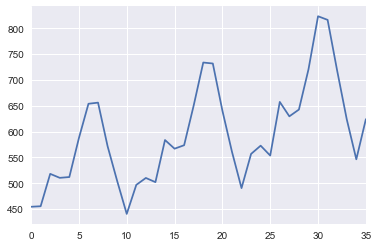

In [43]:
sns.tsplot(forecast2.yhat)
plt.show()